# CMR - Two List Lengths
Now that relevant dependencies are specified and testing, we'll jump right into fitting the model to larger portions of the dataset. This time, we'll do both the 20-item and 30-item list length subsets of the Murdock (1962) dataset.

## Load Data

In [2]:
from instance_cmr.datasets import prepare_murddata
from instance_cmr.model_fitting import cmr_murd_likelihood
from instance_cmr.model_fitting import cmr_murd_objective_function
from instance_cmr.model_fitting import visualize_fit
from instance_cmr.models import CMR
import numpy as np

murd_trials0, murd_events0, murd_length0 = prepare_murddata(
    '../../../data/MurdData_clean.mat', 0)
print(murd_length0, np.shape(murd_trials0))

murd_trials1, murd_events1, murd_length1 = prepare_murddata(
    '../../../data/MurdData_clean.mat', 1)
print(murd_length1, np.shape(murd_trials1))

murd_events1.head()

20 (1200, 15)
30 (1200, 15)


,subject,list,item,input,output,study,recall,repeat,intrusion
0,1,1,1,1,NaN,True,False,0,False
1,1,1,2,2,NaN,True,False,0,False
2,1,1,3,3,NaN,True,False,0,False
3,1,1,4,4,NaN,True,False,0,False
4,1,1,5,5,NaN,True,False,0,False


## Fitting

In [ ]:
from scipy.optimize import differential_evolution
from numba.typed import List
import numpy as np

free_parameters = [
    'encoding_drift_rate',
    'start_drift_rate',
    'recall_drift_rate',
    'shared_support',
    'item_support',
    'learning_rate',
    'primacy_scale',
    'primacy_decay',
    'stop_probability_scale',
    'stop_probability_growth',
    'choice_sensitivity']

lb = np.finfo(float).eps
ub = 1-np.finfo(float).eps

bounds = [
    (lb, ub),
    (lb, ub),
    (lb, ub),
    (lb, ub),
    (lb, ub),
    (lb, ub),
    (lb, 100),
    (lb, 100),
    (lb, ub),
    (lb, 10),
    (lb, 10)
]

# cost function to be minimized
# ours scales inversely with the probability that the data could have been 
# generated using the specified parameters and our model
cost_function = cmr_murd_objective_function(
    List([murd_trials0, murd_trials1]), 
    {'item_counts': List([murd_length0, murd_length1])},
    free_parameters)

result = differential_evolution(
    cost_function, bounds, disp=True)
print(result)

## Results
```
     fun: 50731.32160188566
 message: 'Optimization terminated successfully.'
    nfev: 8451
     nit: 50
 success: True
       x: array([0.66215593, 0.08322989, 0.7852129 , 0.23886633, 0.28628631,
       0.25734628, 6.2000261 , 4.29964005, 0.03562985, 0.22504521,
       4.55361964])
```

We have two sets of visualizations this time so we can visualize parameter fit to each distinct dataset.

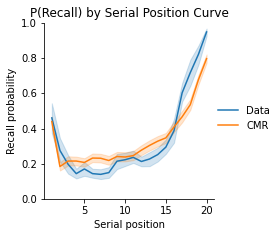

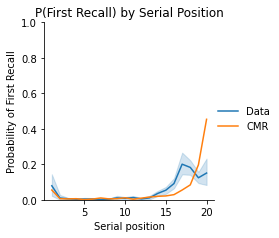

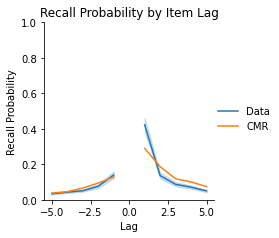

In [6]:
parameters = {
    'item_count':murd_length0,
    'presentation_count': murd_length0
}

visualize_fit(CMR, 
              {**parameters, 
               **{free_parameters[i]:result.x[i] for i in range(len(result.x))}}, 
              murd_events0, 'subject > -1', experiment_count=1000, savefig=True)

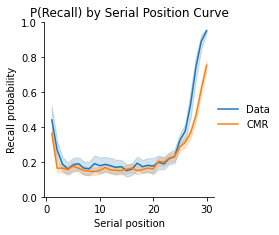

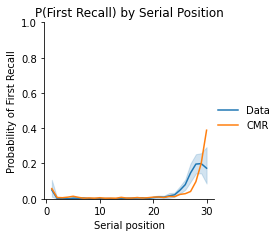

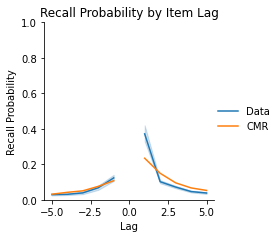

In [7]:
parameters = {
    'item_count':murd_length1,
    'presentation_count': murd_length1
}

visualize_fit(CMR, 
              {**parameters, 
               **{free_parameters[i]:result.x[i] for i in range(len(result.x))}}, 
              murd_events1, 'subject > -1', experiment_count=1000, savefig=True)